In [ ]:
# Creates a playlist of more relevant recommended tracks of a playlist

# install Spotipy first
#!pip install Spotipy

In [48]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util


cid =' ' # Client ID; copy this from your app created on beta.developer.spotify.com
secret = ' ' # Client Secret; copy this from your app
username = ' ' # Your Spotify username

#for avaliable scopes see https://developer.spotify.com/web-api/using-scopes/
scope = 'user-library-read playlist-modify-public playlist-read-private'

redirect_uri='https://beta.developer.spotify.com/dashboard/applications/ef60e9f2d37b4913963c7e7e9c572c96'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username, scope, cid, secret, redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [2]:
#Create a dataframe of your playlist including tracks' names and audio features
import pandas as pd

sourcePlaylistID = '1fCOovfyVaAbUiPlqtRF09'
sourcePlaylist = sp.user_playlist(username, sourcePlaylistID);
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

track_ids = []
track_names = []

for i in range(0, len(songs)):
    if songs[i]['track']['id'] != None: # Removes the local tracks in your playlist if there is any
        track_ids.append(songs[i]['track']['id'])
        track_names.append(songs[i]['track']['name'])

features = []
for i in range(0,len(track_ids)):
    audio_features = sp.audio_features(track_ids[i])
    for track in audio_features:
        features.append(track)
        
playlist_df = pd.DataFrame(features, index = track_names)

In [3]:
playlist_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
The Bluest Blues (feat. George Harrison),0.5180,https://api.spotify.com/v1/audio-analysis/3d5e...,0.404,447240,0.331,3d5e9kJDkgc7Jum8d8xtrl,0.353000,9,0.0786,-11.487,0,0.0245,73.904,4,https://api.spotify.com/v1/tracks/3d5e9kJDkgc7...,audio_features,spotify:track:3d5e9kJDkgc7Jum8d8xtrl,0.2470
Bird of Paradise,0.5960,https://api.spotify.com/v1/audio-analysis/0X7R...,0.471,281467,0.437,0X7RPlCMbifRgyg1RpsR0K,0.641000,1,0.2780,-11.396,1,0.0370,144.333,4,https://api.spotify.com/v1/tracks/0X7RPlCMbifR...,audio_features,spotify:track:0X7RPlCMbifRgyg1RpsR0K,0.3370
The Thrill Is Gone,0.0934,https://api.spotify.com/v1/audio-analysis/1xW9...,0.692,301133,0.493,1xW9HHRQe8MMGF8SBNgkBY,0.001660,9,0.1280,-9.662,0,0.0325,86.644,4,https://api.spotify.com/v1/tracks/1xW9HHRQe8MM...,audio_features,spotify:track:1xW9HHRQe8MMGF8SBNgkBY,0.2800
Times Makes Two,0.6430,https://api.spotify.com/v1/audio-analysis/5LJF...,0.641,325987,0.537,5LJFs3O1BFipvKh2wZHNMs,0.000003,10,0.0528,-6.921,0,0.0342,112.085,4,https://api.spotify.com/v1/tracks/5LJFs3O1BFip...,audio_features,spotify:track:5LJFs3O1BFipvKh2wZHNMs,0.3260
Riding the Blues,0.5050,https://api.spotify.com/v1/audio-analysis/6r8w...,0.438,226987,0.432,6r8w9NhDqcMY3l8SicsaDt,0.005210,4,0.1440,-7.931,0,0.0318,127.104,4,https://api.spotify.com/v1/tracks/6r8w9NhDqcMY...,audio_features,spotify:track:6r8w9NhDqcMY3l8SicsaDt,0.0904


In [3]:
playlist_df=playlist_df[["id", "acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]]
playlist_df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
The Bluest Blues (feat. George Harrison),3d5e9kJDkgc7Jum8d8xtrl,0.5180,0.404,447240,0.331,0.353000,9,0.0786,-11.487,0,0.0245,73.904,0.2470
Bird of Paradise,0X7RPlCMbifRgyg1RpsR0K,0.5960,0.471,281467,0.437,0.641000,1,0.2780,-11.396,1,0.0370,144.333,0.3370
The Thrill Is Gone,1xW9HHRQe8MMGF8SBNgkBY,0.0934,0.692,301133,0.493,0.001660,9,0.1280,-9.662,0,0.0325,86.644,0.2800
Times Makes Two,5LJFs3O1BFipvKh2wZHNMs,0.6430,0.641,325987,0.537,0.000003,10,0.0528,-6.921,0,0.0342,112.085,0.3260
Riding the Blues,6r8w9NhDqcMY3l8SicsaDt,0.5050,0.438,226987,0.432,0.005210,4,0.1440,-7.931,0,0.0318,127.104,0.0904


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

v=TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 6), max_features=10000)
X_names_sparse = v.fit_transform(track_names)
X_names_sparse.shape

(31, 290)

In [5]:
## Change the below info for each playlist manually to get better results
# Give ratings to your tracks with respect to their playlist relevances
# Rate them from 1-10, give higher ratings to those tracks which you think best chracterizes your playlist
# If you order your playlist by relevance while creating it, this step will become easier
# So now, we will deal with a classification task
import numpy as np
playlist_df['ratings']=[10, 9, 9, 10, 8, 6, 8, 4, 3, 5, 7, 5, 5, 8, 8, 7, 8, 8, 10, 8, 10, 8, 4, 4, 4, 10, 10, 9, 8, 8, 4]
playlist_df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,ratings
The Bluest Blues (feat. George Harrison),3d5e9kJDkgc7Jum8d8xtrl,0.5180,0.404,447240,0.331,0.353000,9,0.0786,-11.487,0,0.0245,73.904,0.2470,10
Bird of Paradise,0X7RPlCMbifRgyg1RpsR0K,0.5960,0.471,281467,0.437,0.641000,1,0.2780,-11.396,1,0.0370,144.333,0.3370,9
The Thrill Is Gone,1xW9HHRQe8MMGF8SBNgkBY,0.0934,0.692,301133,0.493,0.001660,9,0.1280,-9.662,0,0.0325,86.644,0.2800,9
Times Makes Two,5LJFs3O1BFipvKh2wZHNMs,0.6430,0.641,325987,0.537,0.000003,10,0.0528,-6.921,0,0.0342,112.085,0.3260,10
Riding the Blues,6r8w9NhDqcMY3l8SicsaDt,0.5050,0.438,226987,0.432,0.005210,4,0.1440,-7.931,0,0.0318,127.104,0.0904,8


In [6]:
# Analyze feature importances
from sklearn.ensemble.forest import RandomForestRegressor, RandomForestClassifier

X_train = playlist_df.drop(['id', 'ratings'], axis=1)
y_train = playlist_df['ratings']
forest = RandomForestClassifier(random_state=42, max_depth=5, max_features=12) # Set by GridSearchCV below
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
  
for f in range(len(importances)):
    print("%d. %s %f " % (f + 1, 
            X_train.columns[f], 
            importances[indices[f]]))


Feature ranking:
1. acousticness 0.186450 
2. danceability 0.138950 
3. duration_ms 0.109225 
4. energy 0.103662 
5. instrumentalness 0.101786 
6. key 0.069612 
7. liveness 0.067485 
8. loudness 0.060709 
9. mode 0.053132 
10. speechiness 0.048724 
11. tempo 0.043043 
12. valence 0.017224 


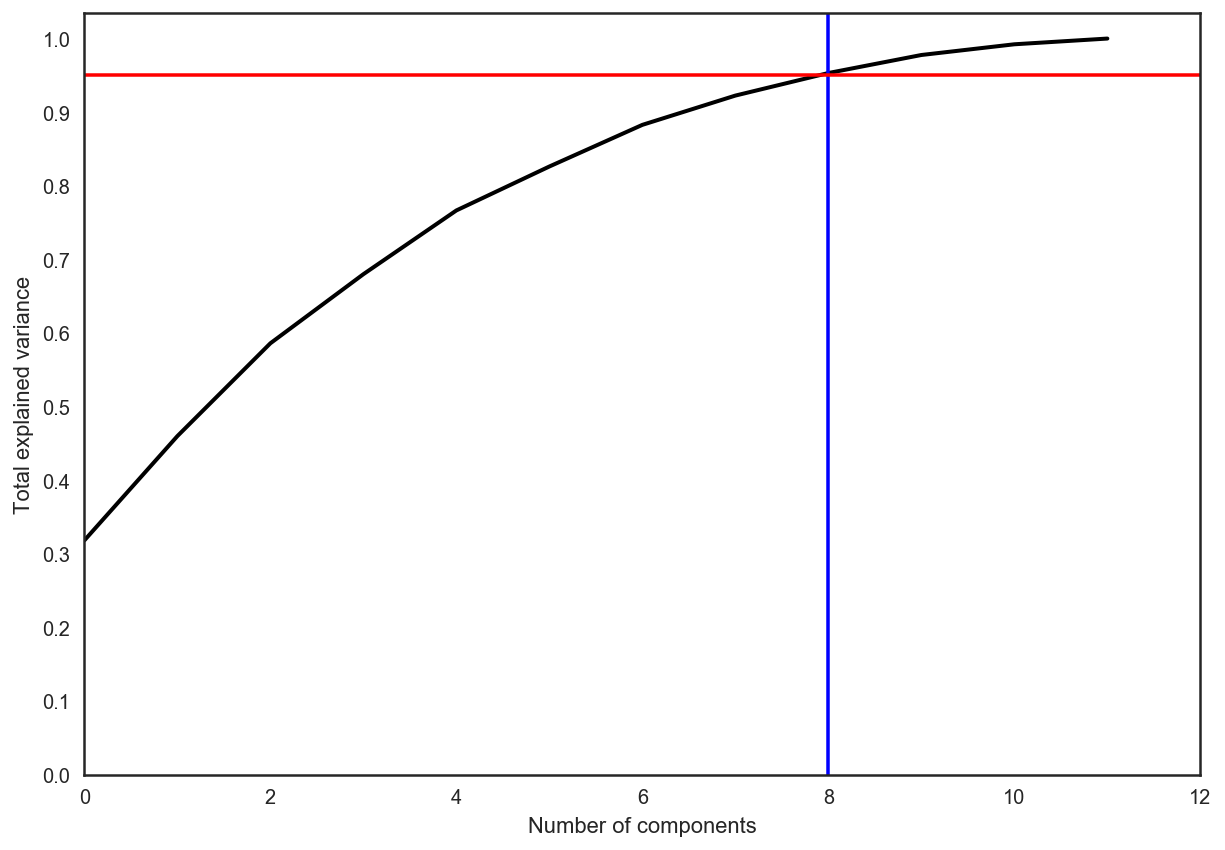

In [7]:
# Apply pca to the scaled train set first

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

X_scaled = StandardScaler().fit_transform(X_train)

pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 12)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(8, c='b') # Tune this so that you obtain at least a 95% total variance explained
plt.axhline(0.95, c='r')
plt.show();

In [8]:
# Fit your dataset to the optimal pca
pca1 = decomposition.PCA(n_components=8)
X_pca = pca1.fit_transform(X_scaled)

In [26]:
# You may want to check the results of TSNE also
from sklearn.manifold import TSNE

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(X_scaled)

In [29]:
from scipy.sparse import csr_matrix, hstack

X_train_last = csr_matrix(hstack([X_pca, X_names_sparse])) # Check with X_tsne + X_names_sparse also

In [12]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Initialize a stratified split for the validation process
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [30]:
# Decision Trees First
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params, cv=skf, n_jobs=-1, verbose=True)

tree_grid.fit(X_train_last, y_train)
tree_grid.best_estimator_, tree_grid.best_score_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   18.4s finished


(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'),
 0.45161290322580644)

In [23]:
# Random Forests second

parameters = {'max_features': [4, 7, 8, 10], 'min_samples_leaf': [1, 3, 5, 8], 'max_depth': [3, 5, 8]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv1 = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv1.fit(X_train_last, y_train)
gcv1.best_estimator_, gcv1.best_score_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   48.9s finished


(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=3, max_features=4, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
             oob_score=True, random_state=42, verbose=0, warm_start=False),
 0.3225806451612903)

In [22]:
# kNN third
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors': range(1, 10)}
knn = KNeighborsClassifier(n_jobs=-1)

knn_grid = GridSearchCV(knn, knn_params, cv=skf, n_jobs=-1, verbose=True)
knn_grid.fit(X_train_last, y_train)
knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   17.9s finished


({'n_neighbors': 1}, 0.2903225806451613)

Don't expect high cross-val scores! Our dataset is way too small...
For my case, PCA + Decision Trees seems to perform better than worst..

In [31]:
# Now build your test set;
# Generate a new dataframe for recommended tracks
# Set recommendation limit as half the Playlist Length per track, you may change this as you like
# Check documentation for  recommendations; https://beta.developer.spotify.com/documentation/web-api/reference/browse/get-recommendations/

rec_tracks = []
for i in playlist_df['id'].values.tolist():
    rec_tracks += sp.recommendations(seed_tracks=[i], limit=int(len(playlist_df)/2))['tracks'];

rec_track_ids = []
rec_track_names = []
for i in rec_tracks:
    rec_track_ids.append(i['id'])
    rec_track_names.append(i['name'])

rec_features = []
for i in range(0,len(rec_track_ids)):
    rec_audio_features = sp.audio_features(rec_track_ids[i])
    for track in rec_audio_features:
        rec_features.append(track)
        
rec_playlist_df = pd.DataFrame(rec_features, index = rec_track_ids)
rec_playlist_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
7cmcFepTOHKMm3FDTbgFCg,0.424,https://api.spotify.com/v1/audio-analysis/7cmc...,0.475,378240,0.399,7cmcFepTOHKMm3FDTbgFCg,0.714000,3,0.9840,-10.672,1,0.0286,121.699,4,https://api.spotify.com/v1/tracks/7cmcFepTOHKM...,audio_features,spotify:track:7cmcFepTOHKMm3FDTbgFCg,0.462
3H2LrcYZk56ahcsYvFCar1,0.523,https://api.spotify.com/v1/audio-analysis/3H2L...,0.368,446240,0.484,3H2LrcYZk56ahcsYvFCar1,0.174000,9,0.0792,-6.214,0,0.0260,73.350,4,https://api.spotify.com/v1/tracks/3H2LrcYZk56a...,audio_features,spotify:track:3H2LrcYZk56ahcsYvFCar1,0.217
5V0fJGwxvKuTSgrGlEO9gn,0.462,https://api.spotify.com/v1/audio-analysis/5V0f...,0.357,190600,0.413,5V0fJGwxvKuTSgrGlEO9gn,0.000030,0,0.3100,-8.267,1,0.1530,76.236,4,https://api.spotify.com/v1/tracks/5V0fJGwxvKuT...,audio_features,spotify:track:5V0fJGwxvKuTSgrGlEO9gn,0.262
5pjQtnAoVLWChCwIZEL2C1,0.429,https://api.spotify.com/v1/audio-analysis/5pjQ...,0.387,300880,0.439,5pjQtnAoVLWChCwIZEL2C1,0.000674,0,0.1070,-8.234,0,0.0276,104.281,3,https://api.spotify.com/v1/tracks/5pjQtnAoVLWC...,audio_features,spotify:track:5pjQtnAoVLWChCwIZEL2C1,0.177
32XnqTSFOqDbD6Sx0BgJww,0.431,https://api.spotify.com/v1/audio-analysis/32Xn...,0.405,153947,0.647,32XnqTSFOqDbD6Sx0BgJww,0.027100,5,0.3240,-7.177,1,0.0400,67.951,4,https://api.spotify.com/v1/tracks/32XnqTSFOqDb...,audio_features,spotify:track:32XnqTSFOqDbD6Sx0BgJww,0.480


In [32]:
X_test_names = v.transform(rec_track_names)

In [33]:
rec_playlist_df=rec_playlist_df[["acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]]

In [34]:
# Make predictions
tree_grid.best_estimator_.fit(X_train_last, y_train)
rec_playlist_df_scaled = StandardScaler().fit_transform(rec_playlist_df)
rec_playlist_df_pca = pca1.transform(rec_playlist_df_scaled)
X_test_last = csr_matrix(hstack([rec_playlist_df_pca, X_test_names]))
y_pred_class = tree_grid.best_estimator_.predict(X_test_last)

In [35]:
rec_playlist_df['ratings']=y_pred_class
rec_playlist_df = rec_playlist_df.sort_values('ratings', ascending = False)
rec_playlist_df = rec_playlist_df.reset_index()

# Pick the top ranking tracks to add your new playlist 9, 10 will work
recs_to_add = rec_playlist_df[rec_playlist_df['ratings']>=9]['index'].values.tolist()


In [38]:
# No ratings of 9 or 10 this case try adding 8's only
recs_to_add = rec_playlist_df[rec_playlist_df['ratings']==8]['index'].values.tolist()

In [39]:
# Check what is about to happen :)
len(rec_tracks), rec_playlist_df.shape, len(recs_to_add)

(465, (465, 14), 424)

In [46]:
rec_array = np.reshape(recs_to_add, (8, 53))

In [40]:
# Create a new playlist for tracks to add - you may also add these tracks to your source playlist and proceed
playlist_recs = sp.user_playlist_create(username, 
                                        name='PCA + tf-idf + DT - Recommended Songs for Playlist - {}'.format(sourcePlaylist['name']))


In [49]:
# Add tracks to the new playlist
for i in rec_array:
    sp.user_playlist_add_tracks(username, playlist_recs['id'], i);

In [ ]:
# This performed really well for my case, and I am pretty satisfied with the resulting playlist -more than the default recommendations